## Merging Ordered and Time-Series Data

In this final chapter, you’ll step up a gear and learn to apply pandas' specialized methods for merging time-series and ordered data together with real-world financial and economic data from the city of Chicago. You’ll also learn how to query resulting tables using a SQL-style format, and unpivot data using the melt method.

### Correlation between GDP and S&P500
In this exercise, you want to analyze stock returns from the S&P 500. You believe there may be a relationship between the returns of the S&P 500 and the GDP of the US. Merge the different datasets together to compute the correlation.

In [5]:
# import pandas
import pandas as pd

# read csv files
sp500 = pd.read_csv("S&P500.csv")
gdp = pd.read_csv("WorldBank_GDP.csv")
print(sp500.head())
print(gdp.head())


# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date', 
                             how='left',  fill_method='ffill')

# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['GDP','Returns']]

# Print gdp_returns correlation
print (gdp_returns.corr())

   Date  Returns
0  2008   -38.49
1  2009    23.45
2  2010    12.78
3  2011     0.00
4  2012    13.41
    Country Name Country Code     Indicator Name  Year           GDP
0          China          CHN  GDP (current US$)  2010  6.087160e+12
1        Germany          DEU  GDP (current US$)  2010  3.417090e+12
2          Japan          JPN  GDP (current US$)  2010  5.700100e+12
3  United States          USA  GDP (current US$)  2010  1.499210e+13
4          China          CHN  GDP (current US$)  2011  7.551500e+12
              GDP   Returns
GDP      1.000000  0.040669
Returns  0.040669  1.000000


### merge_ordered() caution, multiple columns
When using merge_ordered() to merge on multiple columns, the order is important when you combine it with the forward fill feature. The function sorts the merge on columns in the order provided. In this exercise, we will merge GDP and population data from the World Bank for the Australia and Sweden, reversing the order of the merge on columns. The frequency of the series are different, the GDP values are quarterly, and the population is yearly. Use the forward fill feature to fill in the missing data. Depending on the order provided, the fill forward will use unintended data to fill in the missing values.

In [8]:
# read csv files
pop = pd.read_csv("WorldBank_POP.csv")
gdp = pd.read_csv("WorldBank_GDP.csv")
print(pop.head())
print(gdp.head())

# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp, pop, on = ['Country Name', 'Year'], 
                             fill_method='ffill')

# Print date_ctry
print(date_ctry)

  Country Name Country Code     Indicator Name  Year         Pop
0        Aruba          ABW  Population, total  2010    101669.0
1  Afghanistan          AFG  Population, total  2010  29185507.0
2       Angola          AGO  Population, total  2010  23356246.0
3      Albania          ALB  Population, total  2010   2913021.0
4      Andorra          AND  Population, total  2010     84449.0
    Country Name Country Code     Indicator Name  Year           GDP
0          China          CHN  GDP (current US$)  2010  6.087160e+12
1        Germany          DEU  GDP (current US$)  2010  3.417090e+12
2          Japan          JPN  GDP (current US$)  2010  5.700100e+12
3  United States          USA  GDP (current US$)  2010  1.499210e+13
4          China          CHN  GDP (current US$)  2011  7.551500e+12
     Country Name Country Code_x   Indicator Name_x  Year           GDP  \
0     Afghanistan            NaN                NaN  2010           NaN   
1     Afghanistan            NaN              

### Subsetting rows with .query()
In this exercise, you will revisit GDP and population data for Australia and Sweden from the World Bank and expand on it using the .query() method. You'll merge the two tables and compute the GDP per capita. Afterwards, you'll use the .query() method to sub-select the rows and create a plot. Recall that you will need to merge on multiple columns in the proper order.

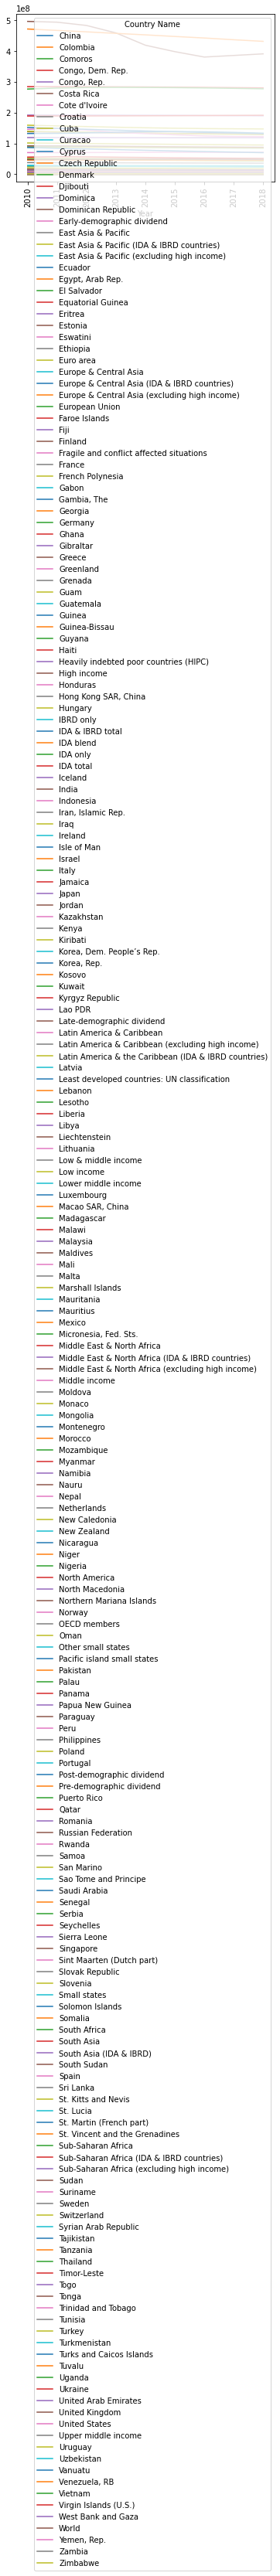

In [15]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['Country Name','Year'], fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['GDP'] / gdp_pop['Pop']

# Pivot data so gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'Year', 'Country Name')

# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('Year >= 1991')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)